In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df2013 = pd.read_csv('/home/ubuntu/supreme_court/data/data_2013.csv')
df2014 = pd.read_csv('/home/ubuntu/supreme_court/data/data_2014.csv')
df2015 = pd.read_csv('/home/ubuntu/supreme_court/data/data_2015.csv')
df2016 = pd.read_csv('/home/ubuntu/supreme_court/data/data_2016.csv')
df2017 = pd.read_csv('/home/ubuntu/supreme_court/data/data_2017.csv')
df2018 = pd.read_csv('/home/ubuntu/supreme_court/data/data_2018.csv')
df2019 = pd.read_csv('/home/ubuntu/supreme_court/data/data_2019.csv')
df2020 = pd.read_csv('/home/ubuntu/supreme_court/data/data_2020.csv')
df2021 = pd.read_csv('/home/ubuntu/supreme_court/data/data_2021.csv')
df2022 = pd.read_csv('/home/ubuntu/supreme_court/data/data_2022.csv')
df2023 = pd.read_csv('/home/ubuntu/supreme_court/data/data_2023.csv')

In [6]:
df_all = pd.concat([df2013, df2014, df2015, df2016, df2017, df2018, df2019, \
                    df2020, df2021, df2022, df2023])

In [ ]:
# Calculate total number of decisions:
num_rows = len(df_all)
# Calculate unanimous decisions:
num_nan_rows = df_all['Dissenting'].isna().sum()
# Calculate percentage of decisions that were unanimous:
perc_una = num_nan_rows / num_rows
perc_una

In [7]:
# Create dataframe containing only decisions with dissent:
df_dissent = df_all[df_all['Dissenting'].notna()]

In [8]:
df_constitution = df_dissent[df_dissent['Subjects'] == 'Constitutional law']

In [9]:
df_constitution.shape

(17, 14)

In [21]:
# Define "caucuses"
harper_justices = ['Brown', 'Côté', 'Gascon', 'Wagner', 'Moldaver', 'Karakatsanis', 'Cromwell']
trudeau_justices = ['Bonsawin', 'Jamal', 'Kasirer', 'Martin', 'Rowe']
# set "or" selector
pattern1 = '|'.join(harper_justices)
pattern2 = '|'.join(trudeau_justices)

In [34]:
# Calculate dissent rates for all non-unanimous decisions:
df_conservative_total_ruling = df_dissent[~df_dissent['Dissenting'].str.contains(pattern1)]
df_liberal_total_ruling = df_dissent[~df_dissent['Dissenting'].str.contains(pattern2)]

In [37]:
df_conservative_total_ruling.shape

(4, 14)

In [38]:
df_liberal_total_ruling.shape

(61, 14)

In [40]:
# Filter for results where the dissent was from pre-Harper justices
matching_rows_all = pd.merge(df_conservative_total_ruling, df_liberal_total_ruling, on=['Dissenting'])
matching_rows_all.shape

(5, 27)

In [42]:
# Calculate dissent rates for only unanimous decisions:
df_conservative_constitution_ruling = df_constitution[~df_constitution['Dissenting'].str.contains(pattern1)]
df_liberal_constitution_ruling = df_constitution[~df_constitution['Dissenting'].str.contains(pattern2)]

In [44]:
# Filter for results where the dissent was from pre-Harper justices
matching_rows_constitution = pd.merge(df_conservative_constitution_ruling, \
                         df_liberal_constitution_ruling, on=['Dissenting'])
matching_rows_constitution.shape

(1, 27)

In [46]:
df_liberal_constitution_ruling.shape

(8, 14)

In [47]:
df_conservative_constitution_ruling.shape

(1, 14)

In [2]:
uj = pd.read_csv('/home/ubuntu/supreme_court/data/unanimous_judgments.csv')

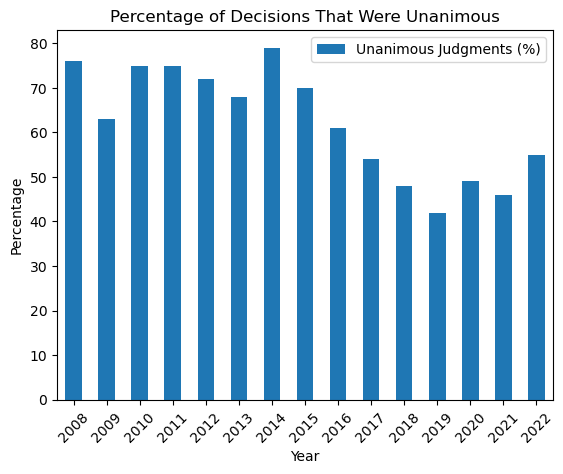

In [3]:
# Generate graph of unanimous votes
# Cannot be executed twice(!?)
uj['Year'] = pd.to_datetime(uj['Year'], format='%Y')
uj.set_index('Year', inplace=True)
uj.plot(kind='bar')
plt.ylabel('Percentage')
plt.title('Percentage of Decisions That Were Unanimous')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(uj.index.strftime('%Y')))
plt.show()